# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# ваш код тут
expon_rv = sts.expon()
sample_e = expon_rv.rvs(100)
sample_e


array([3.76569533e-01, 2.99270257e-01, 1.86177985e+00, 1.62907035e+00,
       3.50870907e-01, 8.36141889e-04, 3.62167542e-01, 9.52110155e-01,
       2.29014519e+00, 7.68576850e-01, 3.29718588e+00, 8.14649943e-02,
       7.84243039e-01, 4.38348790e-03, 1.86935272e+00, 2.36007337e+00,
       7.12825174e-02, 1.11743335e+00, 4.42877903e-01, 9.47608314e-01,
       3.04609265e+00, 1.14250584e-01, 2.36280355e-03, 8.20179058e-01,
       9.52702033e-01, 3.39786156e-02, 4.47361593e+00, 3.02711088e+00,
       1.87061310e+00, 9.70641014e-01, 4.26319244e-01, 5.68429178e-01,
       3.77525147e-01, 2.12909992e-01, 3.71719347e+00, 3.20992458e+00,
       4.80427834e-01, 9.41792332e-01, 2.22871762e-01, 1.36101750e+00,
       2.03925712e+00, 3.32572053e-01, 1.25443891e+00, 4.01622957e-01,
       1.48265660e+00, 3.50266762e+00, 4.58040721e-01, 5.53986078e-01,
       2.35866607e+00, 1.31833801e+00, 1.87362892e+00, 2.42535182e+00,
       1.48394444e+00, 6.03945336e-01, 1.04995979e+00, 6.69573086e-01,
      

In [3]:
sample_e.dtype

dtype('float64')

In [4]:
real_mean_e = expon_rv.mean() # настоящее среднее случайной величины
real_mean_e

1.0

In [5]:
real_var_e = expon_rv.var() # настоящая дисперсия случайной величины
real_var_e

1.0

### Постройте гистограмму выборки и теоретическую плотность распределения

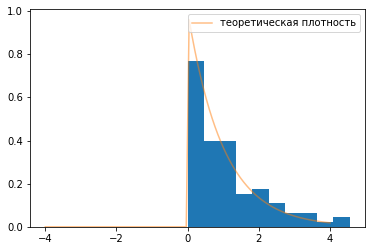

In [6]:
# ваш код тут
plt.hist(sample_e , density=True)
x = np.linspace(-4,4,100)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()


In [8]:
sample_mean = sample_e.mean() # выборочное среднее
print(sample_mean)
sample_var = sample_e.var() # выборочная дисперсия
print(sample_var)
sample_std = sample_e.std() # выборочное стандартное отклонение
print(sample_std)


1.0847233651565136
1.0677802268152206
1.0333345183507714


In [11]:
N = 100
# сгенерируем много выборочных средних
means = []
for i in range(1000):
  means.append(np.mean(expon_rv.rvs(N)))

(array([0.07819283, 0.03909642, 0.39096415, 0.97741039, 0.86012114,
        1.05560322, 2.38488134, 2.69765266, 3.51867739, 3.98783437,
        3.75325588, 4.18331645, 3.12771323, 3.47958097, 2.18939926,
        1.79843511, 1.68114586, 1.09469963, 0.54734982, 0.54734982,
        0.35186774, 0.23457849, 0.11728925]),
 array([0.72345484, 0.74903263, 0.77461042, 0.80018821, 0.82576601,
        0.8513438 , 0.87692159, 0.90249938, 0.92807718, 0.95365497,
        0.97923276, 1.00481055, 1.03038835, 1.05596614, 1.08154393,
        1.10712172, 1.13269952, 1.15827731, 1.1838551 , 1.20943289,
        1.23501069, 1.26058848, 1.28616627, 1.31174406]),
 <a list of 23 Patch objects>)

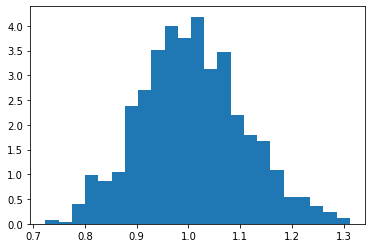

In [12]:
plt.hist(means, density=True, bins='auto')

### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

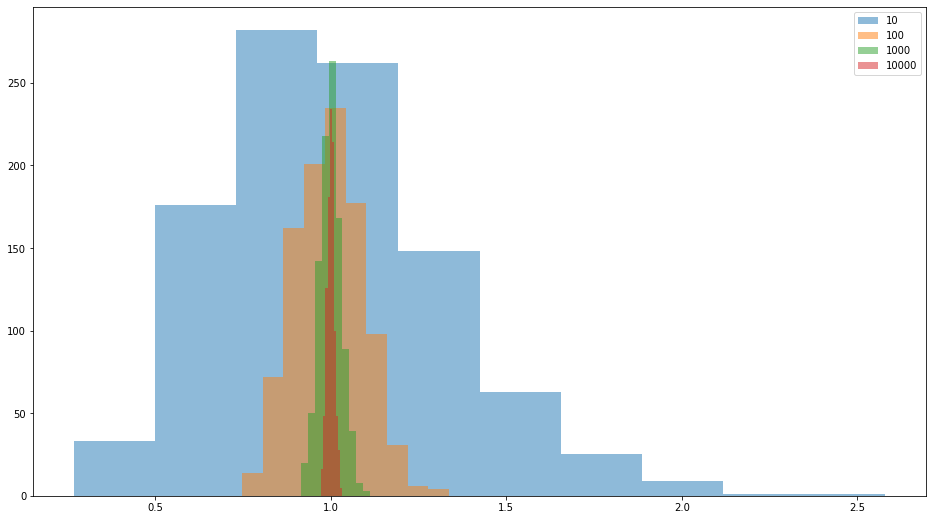

In [13]:
# ваш код тут
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
  means = []
  for i in range(1000):
    means.append(np.mean(expon_rv.rvs(N)))
  plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()




Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
#При увеличении числа выборочных средних (n=10000) стандартная ошибка значитеотно уменьшилась.
#Большинство наблюдений лежат совсем близко с реальным показателем. Чем больше число наблюдений, тем ближе
#все выборочные средние к среднему генеральной совокупности- меньше стандартная ошибка среднего.

In [ ]:
#Признак в нашей  генеральной совокупности  распределен ненормально f(x)=exp(-x).
#Но в такой ситуации, распределение выборочных средних также окажется близким к нормальному. 
#Если мы будем выбирать из  нашей генеральной совокупности выборки объема n, то их средние тоже будут распределены
#нормально со средним равным среднему признака в генеральной совокупности  и стандартным отклонением, se.
#Следовательно, если распределение ненормальное, это не означает, что мы не можем проверять статистические гипотезы 
#в таком случае. Не смотря на то, что сам признак распределен ненормальным образом.*


#*Вывод сделан на основе материалов лекции и  дополнительно -  материалов курса "Основы статистики" 
#Санкт-Петербургского института биоинформатики.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [14]:
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn import model_selection, datasets, linear_model, tree, metrics, neighbors
from matplotlib import pyplot as plt

%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [15]:
df = pd.read_csv('telecom_churn.csv',  sep=',')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [16]:
df1=df[['total day calls','churn']]
df1.head()

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False


In [17]:
df1['churn']=df1['churn'].astype(int)
df1.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total day calls,churn
0,110,0
1,123,0
2,114,0
3,71,0
4,113,0


In [ ]:
#Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, 
#используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

In [18]:
from statsmodels.stats.proportion import proportion_confint

In [19]:
df1['churn'].mean()

0.14491449144914492

In [20]:
df1['total day calls'].mean()

100.43564356435644

In [91]:
normal_interval = proportion_confint(df1['churn'].sum(), df1.shape[0], method = 'normal', alpha=0.05)

In [92]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.132964, 0.156865] with width 0.023901


In [ ]:
# для биномиального распределения  доверительный интервал

In [ ]:
#Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
#from statsmodels.stats.weightstats import _zconfint_generic. 
#Сравните результаты.

In [22]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [23]:
df2=df1['churn']
df2
df3=np.array(df2)
df3

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
y=df1['churn']
y
y=np.array(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
x=df1['total day calls']
x
x=np.array(x)
x=x.reshape(len(x),1)
x

array([[110],
       [123],
       [114],
       ...,
       [109],
       [105],
       [113]], dtype=int64)

In [71]:
np.zeros_like(x)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

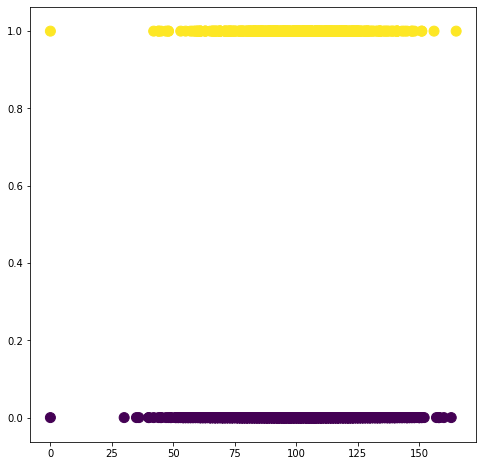

In [28]:
pylab.figure(figsize(8, 8))
pylab.scatter(x,y, c = y,cmap='viridis',
             s=100)

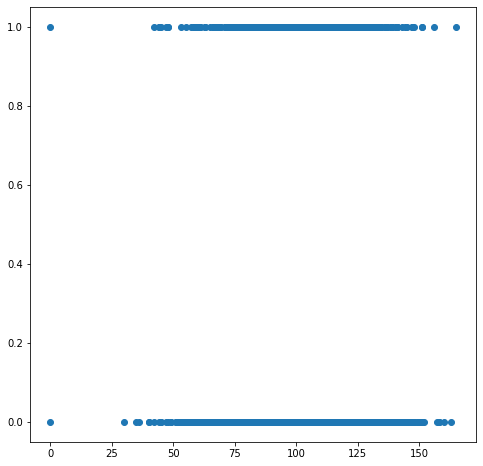

In [29]:
pylab.plot(x,y,'o')

In [30]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(x,y, 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

In [31]:
train_labels

array([0, 0, 0, ..., 0, 1, 0])

In [32]:
logreg_model = linear_model.LogisticRegression()
logreg_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, logreg_model.predict(test_data))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5

In [33]:
knn_model = neighbors.KNeighborsClassifier(7)
knn_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, knn_model.predict(test_data))

0.5004033071183707

In [34]:
#Оценка среднего
knn_auc_scores = model_selection.cross_val_score(neighbors.KNeighborsClassifier(7), 
                                 x, y, scoring = 'roc_auc', cv = 20)

In [35]:
logreg_auc_scores = model_selection.cross_val_score(linear_model.LogisticRegression(), 
                                 x, y, scoring = 'roc_auc',  
                                 cv = 20)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [36]:
#Точечная оценка среднего
print("knn model auc: mean %.3f, std %.3f" % (knn_auc_scores.mean(), knn_auc_scores.std(ddof=1)))
print("logreg model auc: mean %.3f, std %.3f" % (logreg_auc_scores.mean(), logreg_auc_scores.std(ddof=1)))

knn model auc: mean 0.517, std 0.072
logreg model auc: mean 0.521, std 0.075


In [37]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [38]:
knn_mean = knn_auc_scores.mean()
logreg_mean = logreg_auc_scores.mean()
knn_mean, logreg_mean

(0.5174539052496798, 0.5210313679864736)

In [39]:
print("knn model mean auc 95%% confidence interval", _zconfint_generic(knn_mean, 
                                                                  sqrt(0.1/len(knn_auc_scores)), 
                                                                  0.05, 'two-sided'))

print("logreg model mean auc 95%% confidence interval", _zconfint_generic(logreg_mean, 
                                                                    sqrt(0.1/len(logreg_auc_scores)), 
                                                                    0.05, 'two-sided'))

knn model mean auc 95%% confidence interval (0.37886352281471203, 0.6560442876846476)
logreg model mean auc 95%% confidence interval (0.38244098555150585, 0.6596217504214414)


In [ ]:
# Это доверительный интервал  для качества настрстройки модели  roc_auc метрики

In [ ]:
#ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ

In [40]:
df[df.churn==True].mean()-df[df.churn==False].mean()

account length             1.870912
area code                  0.743069
number vmail messages     -3.488619
total day minutes         31.738324
total day calls            1.052246
total day charge           5.395500
total eve minutes         13.366847
total eve calls            0.522480
total eve charge           1.136060
total night minutes        5.098484
total night calls          0.341340
total night charge         0.229454
total intl minutes         0.541123
total intl calls          -0.369421
total intl charge          0.146141
customer service calls     0.779989
churn                      1.000000
dtype: float64

In [4]:
df_churn=df.groupby(['churn'])['number vmail messages','total day minutes','total day calls', 'total day charge','total eve minutes','total eve calls','total eve charge','total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls'  ].mean().reset_index()
df_churn

,churn,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,False,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
1,True,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


In [5]:
df_churn.set_index('churn', inplace=True)
df_churn

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
churn,,,,,,,,,,,,,,
False,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


In [6]:
df_churn_T=df_churn.T

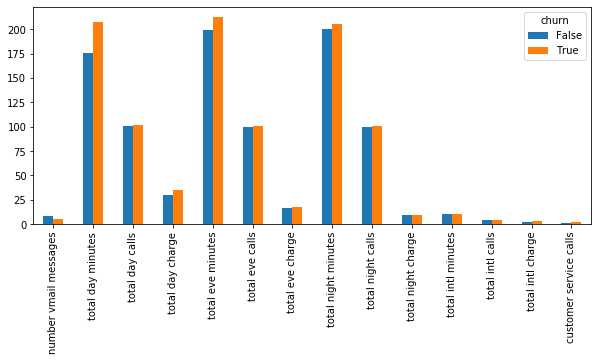

In [7]:
df_churn_T.plot(kind='bar', figsize=(10, 4))

In [ ]:
#!!!!!При условии, что churn==True это клиенты, покидающие компанию и churn==False клиенты, остающиеся в компании.

In [ ]:
#Вывод по первому приближению на основании  средних значений  представленных показателей
#Клиенты со статусом churn==True  в среднем дольше разговаривают днем, вечером и ночью- tota calls , траты на 
# звонки у них соответственно выше- total  charge. Возможно, это категория клиентов, которым нужен более дешевый тариф 
#   типа безлимитный. Необходимо проанализировать стоимость таких тарифов у компании и у конкурентов. 
# Так же у  клиентов со статусом churn==True наблюдается в среднем  большее количество звонков в службу сервиса, чем у клиентов 
#  со статусом churn==False, что указывает на повышенные претензии/вопросы к сервису компании.
# Доля клиентов компании со статусом churn==True составляет 14% от всех клиентов в выборке.



In [ ]:
# ПРИМЕНИМ К ДАННЫМ  МЕТОД СТАНДАРТИЗАЦИИ, ТАК КАК НА ОДНОМ ГРАФИКЕ ИЗ ЗА РАЗНЫХ МАСШТАБОВ ЗАТРУДНИТЕЛЬНО
#РАССМОТРЕТЬ ПРЕДСТАВЛЕНИЯ ПО ВСЕМ ПОКАЗАТЕЛЯМ

In [9]:
df_churn_st=(df_churn-df_churn.mean())/df_churn.std()
df_churn_st

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
churn,,,,,,,,,,,,,,
False,0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,0.707107,-0.707107,-0.707107
True,-0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,-0.707107,0.707107,0.707107


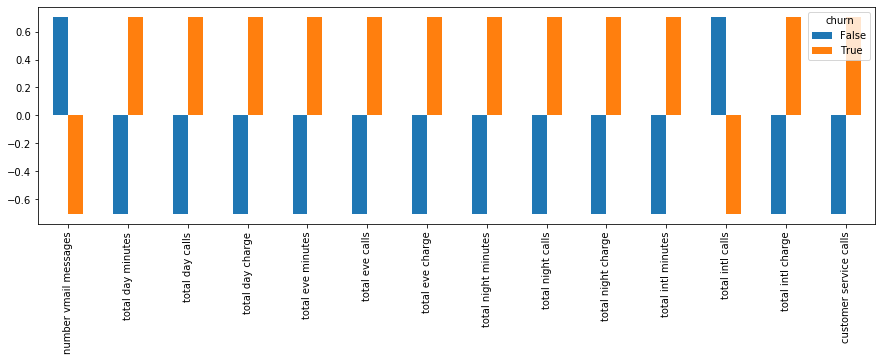

In [14]:
df_churn_st_T=df_churn_st.T
df_churn_st_T
df_churn_st_T.plot(kind='bar', figsize=(15, 4))

In [ ]:
#А вот  теперь видно неажиданный на первый взгляд вывод. клиенты со статусом churn==True вообще в целом более активные 
#по  использованию сотовой связи и менее активные по использованию СМС сообщений. 
#Необходимо проанализировать данные по этим клиентам в разных разрезах/плоскостях.. 
#Для этих клиентов возможно  нет   явно подходящего им тарифа по их активности

In [ ]:
#  ПОСМОТРИМ НА КОСВЕННОЕ ВЛИНИЕ ИНЫХ ПОКАЗАТЕЛЕЙ ЧЕРЕЗ КОРРЕЛЯЦИЮ С  ПОКАЗАТЕЛЯМИ tota calls




In [100]:
df_churn_korr=df[['number vmail messages','total day minutes','total day calls', 'total day charge','total eve minutes','total eve calls','total eve charge','total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']]  
df_churn_korr.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [101]:
df_churn_korr_matrix = df_churn_korr.corr().T
df_churn_korr_matrix

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
number vmail messages,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total day minutes,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total eve calls,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total eve charge,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total night minutes,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
total night calls,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802
total night charge,0.007663,0.004300,0.022927,0.004301,-0.012593,-0.002056,-0.012601,0.999999,0.011188,1.000000,-0.015214,-0.012329,-0.015186,-0.009277


([<matplotlib.axis.YTick at 0x2105aed59c8>,
 <a list of 14 Text yticklabel objects>)

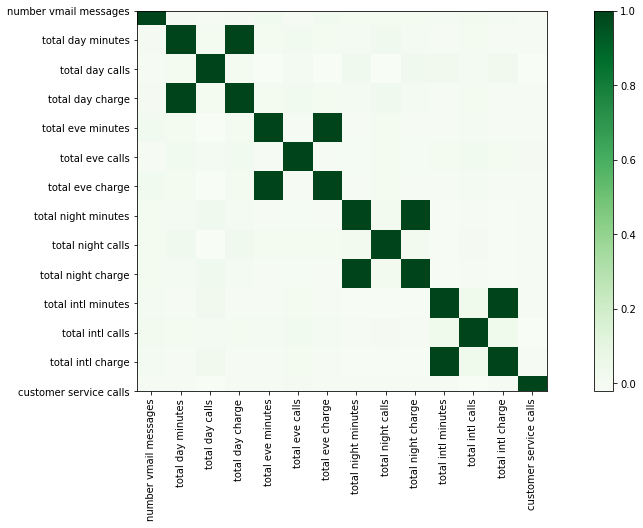

In [103]:
plt.figure(figsize=(17, 7))
plt.imshow(df_churn_korr_matrix, cmap='Greens')
plt.colorbar()  # добавим шкалу интенсивности цвета

plt.xticks(range(len(df_churn_korr_matrix.columns)), df_churn_korr_matrix.columns,rotation=90)
plt.yticks(range(len(df_churn_korr_matrix)), df_churn_korr_matrix.index)



In [ ]:
#Выявлена взаимосвязь между количеством минут разговора и платы за разговор. С одной стороны это очевидно, 
#  но с другой стороны опять же на основе такой явной взаимосвязи (Kкорр=1) можно сдеоать предположение 
#о негибкости тарифов, поэтому возможно и наблюдается отток клиентов более активно пользующихся связью.

In [ ]:
#Предположения по первому приближению. Необходимо более глубокое исследование. Возможно есть разница в разрезе 
#регионов.